#Research in Data Science: Heart Disease Detection


**About the Heart_Disease.csv file:**

This dataset contains 10,000 records simulating patient data related to heart disease. It aims to aid in the exploration and modeling of cardiovascular health risks and treatment outcomes. The data includes various medical and demographic features, making it an excellent resource for developing predictive models and conducting health analytics.

**Key Features:**

* **Blood Pressure (mmHg):** Simulated values reflecting typical hypertension ranges.
* **Cholesterol (mg/dL):** Values adjusted to fall within common cholesterol levels.
* **Body Mass Index (BMI):** Calculated to represent healthy to overweight classifications.
* **Glucose Level (mg/dL):** Simulated to represent fasting glucose levels.
* **Heart Disease (Target Variable):** Binary indicator (0 = No, 1 = Yes) representing the presence of heart disease.
* **Gender (Male/Female):** Randomly assigned to simulate demographic diversity.
* **Age (Years):** Patients aged between 18 and 80 years.
* **State and Country:** Includes random assignments of US states and the country as the USA.
* **Hospital:** Randomly assigned hospitals to represent different healthcare facilities.
* **Treatment Options:** Various treatment methods including Physiotherapy, Medication, Surgery, Rehabilitation, and Counseling.
* **Treatment Date:** Randomly generated dates for when treatments were administered.







##1. Importing the libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##2. Importing the dataset

In [95]:
df = pd.read_csv("/content/Heart_Disease.csv")
df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.068129,270.564349,36.101427,63.487954,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1
1,Bob Williams,44,USA,North Dakota,100.383639,160.910030,14.330471,187.008977,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0
2,Oliver Jones,22,USA,Iowa,145.618318,208.490251,20.277098,35.903576,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0
3,Quinn Davis,19,USA,Louisiana,152.577870,348.153738,62.712693,31.495166,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1
4,Alice Martinez,64,USA,Massachusetts,111.793570,200.628925,14.468485,154.513129,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1


In [96]:
df.shape

(10000, 15)

##3. Data Cleaning and Validation

In [97]:
df.isnull().sum()

,0
full_name,0
age,0
country,0
state,0
blood_pressure,0
cholesterol,0
bmi,0
glucose_level,0
gender,0
first_name,0


In [98]:
df.duplicated().sum()

0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       10000 non-null  object 
 1   age             10000 non-null  int64  
 2   country         10000 non-null  object 
 3   state           10000 non-null  object 
 4   blood_pressure  10000 non-null  float64
 5   cholesterol     10000 non-null  float64
 6   bmi             10000 non-null  float64
 7   glucose_level   10000 non-null  float64
 8   gender          10000 non-null  object 
 9   first_name      10000 non-null  object 
 10  last_name       10000 non-null  object 
 11  hospital        10000 non-null  object 
 12  treatment       10000 non-null  object 
 13  treatment_date  10000 non-null  object 
 14  heart_disease   10000 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [100]:
df= df.round({'blood_pressure': 2, 'cholesterol': 2, 'bmi': 2, 'glucose_level': 2})

In [101]:
df.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease
0,Alice Johnson,21,USA,Utah,138.07,270.56,36.10,63.49,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1
1,Bob Williams,44,USA,North Dakota,100.38,160.91,14.33,187.01,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0
2,Oliver Jones,22,USA,Iowa,145.62,208.49,20.28,35.90,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0
3,Quinn Davis,19,USA,Louisiana,152.58,348.15,62.71,31.50,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1
4,Alice Martinez,64,USA,Massachusetts,111.79,200.63,14.47,154.51,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1


In [102]:
# Show value counts for columns
for column in df.columns:
    print(f"Value counts for column {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for column full_name:
full_name
Kelly Martinez     74
Quinn Williams     71
Bob Williams       67
Sam Martinez       66
Alice Rodriguez    65
                   ..
Paul Garcia        35
Sam Garcia         33
Kelly Davis        33
Kelly Miller       32
Quinn Martinez     32
Name: count, Length: 200, dtype: int64


Value counts for column age:
age
36    190
25    187
66    184
37    180
68    179
     ... 
79    143
42    141
60    140
48    140
45    133
Name: count, Length: 62, dtype: int64


Value counts for column country:
country
USA    10000
Name: count, dtype: int64


Value counts for column state:
state
Michigan          240
Oregon            228
New Mexico        226
Mississippi       224
Connecticut       224
New Hampshire     214
Maryland          212
Hawaii            212
Massachusetts     212
North Dakota      211
Rhode Island      210
Idaho             209
Oklahoma          209
Kentucky          208
West Virginia     206
Florida           204
Arizona           

In [103]:
df.describe()

,age,blood_pressure,cholesterol,bmi,glucose_level,heart_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.566700,104.837405,206.309329,21.418248,90.239295,0.500700
std,17.962461,33.437069,95.123826,13.011337,91.885675,0.500025
min,18.000000,10.460000,0.180000,0.010000,-185.810000,0.000000
25%,33.000000,81.307500,131.377500,10.900000,13.780000,0.000000
50%,49.000000,97.745000,213.825000,21.060000,88.910000,1.000000
75%,64.000000,124.315000,279.350000,28.840000,164.695000,1.000000
max,79.000000,244.540000,539.090000,75.310000,377.560000,1.000000


##4. Creating New Features: To get more information.

### **1. Blood Pressure levels (mm Hg):**

**Low (<90):** A low blood pressure reading is usually good. Some people with very low blood pressure have a condition called hypotension. This occurs when blood pressure is less than 90/60 mm Hg. Low blood pressure is usually not harmful unless there are other symptoms that concern a health care professional.

**Normal (<120):** If your blood pressure is in the normal range, stick with heart-healthy habits such as following a balanced diet and getting regular exercise.

**Elevated (<130):** If your blood pressure is elevated, work with your health care professional to control the condition.

**Stage 1 (<140):** In hypertension Stage 1, your health care professional should prescribe lifestyle changes. They may consider adding medication based on your risk of heart disease or stroke and should add medication if you have other conditions such as diabetes, heart failure and kidney disease.

**Stage 2 (<180):** In hypertension Stage 2, your health care professional should prescribe blood pressure medication and lifestyle changes.

**Hypertensive (180<):** hypertensive, can lead to serious health problems including heart attack or stroke. Measuring your blood pressure is the only way to know if you have it. Controlling high blood pressure can help prevent major health problems.

In [104]:
# Function to categorize blood pressure
def categorize_bp(bp):
    if bp < 90:
        return 'Low'
    elif bp < 120:
        return 'Normal'
    elif bp < 130:
        return 'Elevated'
    elif bp < 140:
        return 'Stage 1'
    elif bp < 180:
        return 'Stage 2'
    else:
        return 'Hypertensive'

# Apply the function to create a new column
df['bp_levels'] = df['blood_pressure'].apply(categorize_bp)

In [105]:
df['bp_levels'].value_counts()

,count
bp_levels,
Low,3839
Normal,3406
Stage 2,1464
Elevated,555
Stage 1,486
Hypertensive,250


###**2. Cholesterol levels (mg/dL):** Cholesterol is a waxy, fat-like substance that's found in all the cells in our body.

**Normal (<200):** A total cholesterol level below 200 mg/dL is considered normal and healthy. People in this range generally have a lower risk of developing heart disease or stroke.

**Borderline High (<240):** While not immediately dangerous, it signals a heightened risk of cardiovascular diseases if levels continue to rise or if other risk factors like smoking or high blood pressure are present.

**High (240<):** While not immediately dangerous, it signals a heightened risk of cardiovascular diseases if levels continue to rise or if other risk factors like smoking or high blood pressure are present.

In [106]:
# Function to categorize cholesterol levels
def categorize_cholesterol(chol):
    if chol < 200:
        return 'Normal'
    elif chol < 240:
        return 'Borderline High'
    else:
        return 'High'

# Apply the function to create a new column
df['cholesterol_levels'] = df['cholesterol'].apply(categorize_cholesterol)

In [107]:
df['cholesterol_levels'].value_counts()

,count
cholesterol_levels,
Normal,4492
High,3983
Borderline High,1525


###**3. Body Mass Index Levels:** BMI is used to categorise people’s weight.

**Underweight (<18.5):** This may indicate that a person is not eating enough or has a medical condition that affects their weight. Being underweight can also pose health risks, including weakened immune function and nutrient deficiencies.

**Normal (<24.9):** This range is considered ideal or healthy. It suggests that a person's weight is appropriate for their height, which may reduce the risk of serious health conditions like heart disease, diabetes, and certain cancers.

**Overweight (<29.9):** It may not immediately lead to serious health issues, it increases the risk of developing conditions like type 2 diabetes, high blood pressure, and heart disease over time.

**Obese (29.9<):** This BMI level is categorized as severe or morbid obesity. It carries a high risk of life-threatening health conditions such as heart disease, diabetes, stroke, and breathing difficulties. It often requires medical interventions, including lifestyle changes or surgery, to reduce weight and manage health risks.

In [108]:
#Function to categorize Body Mass Index (BMI) levels
def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif bmi < 24.9:
    return 'Normal'
  elif bmi < 29.9:
    return 'Overweight'
  else:
    return 'Obese'

#Apply the function to create a new column
df['bmi_levels'] = df['bmi'].apply(categorize_bmi)

In [109]:
df['bmi_levels'].value_counts()

,count
bmi_levels,
Underweight,4092
Normal,2213
Obese,2211
Overweight,1484


###**4. Glucose Levels (mg/dL):** Sugar level is measured.

**Normal (<100):** Indicates healthy blood sugar control. Individuals with normal levels are at a low risk of developing diabetes or other blood sugar-related issues.

**Pre-diabetes (<125):** Meaning blood sugar levels are higher than normal but not yet high enough to be classified as diabetes. Prediabetes increases the risk of developing type 2 diabetes, heart disease, and stroke. Lifestyle changes, such as diet and exercise, can help prevent or delay the onset of diabetes.

**Diabetes (125<):** This is a chronic condition that requires careful management, including medication, diet, and regular monitoring, to prevent complications like cardiovascular disease, nerve damage, kidney issues, and more.

In [110]:
#Function to categorize Glucose level to detect patient with diabities or not
def categorize_glucose(glucose):
  if glucose < 100:
    return 'Normal'
  elif glucose < 125:
    return 'Pre-diabetes'
  else:
    return 'Diabetes'

#Apply the function to create a new column
df['glucose_levels'] = df['glucose_level'].apply(categorize_glucose)

In [111]:
df['glucose_levels'].value_counts()

,count
glucose_levels,
Normal,5310
Diabetes,3982
Pre-diabetes,708


##5. Exploratory Data Analysis


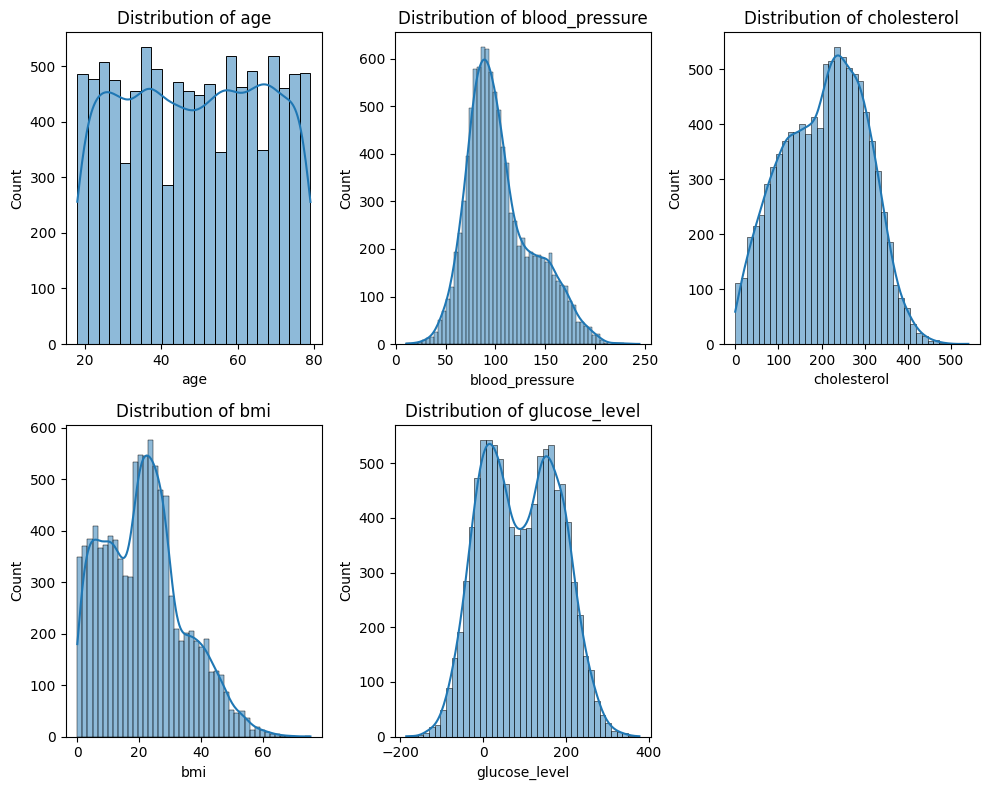

In [112]:
# Distribution plots
numeric_cols = ['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose_level']

plt.figure(figsize=(10,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

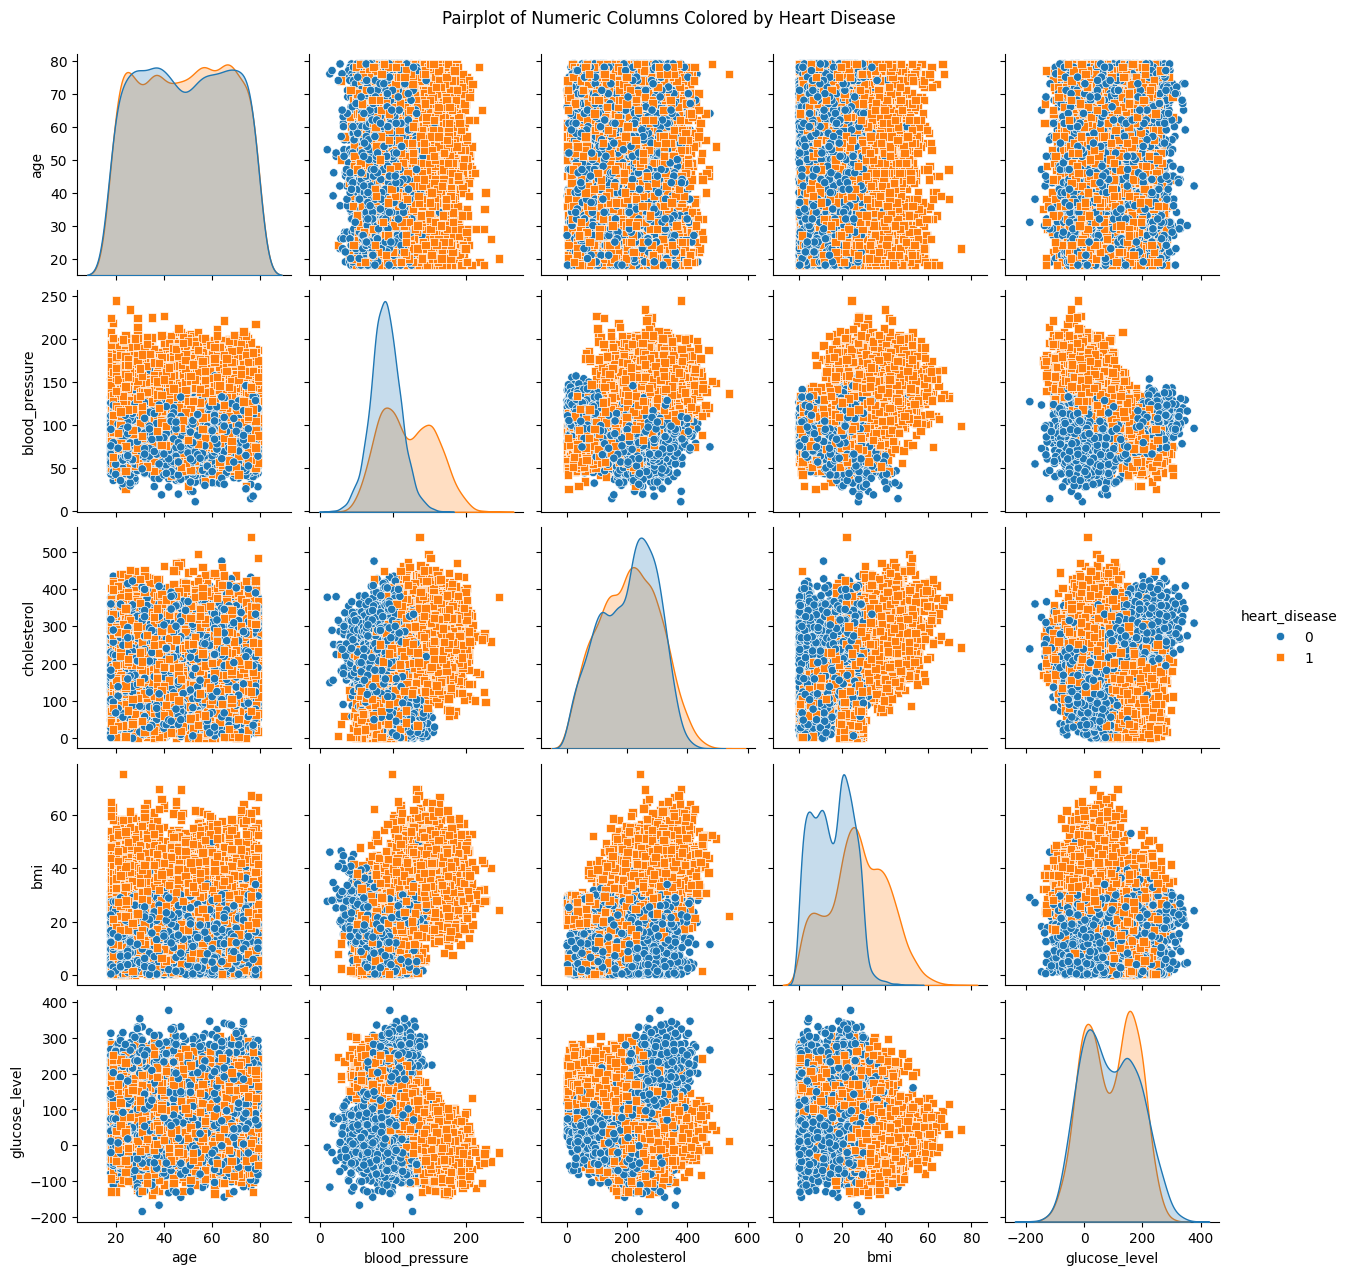

In [113]:
#Pairplots
sns.pairplot(df, hue='heart_disease', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot of Numeric Columns Colored by Heart Disease', y=1.02)
plt.show()

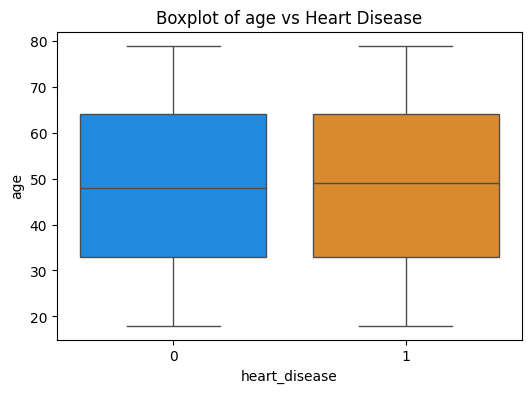

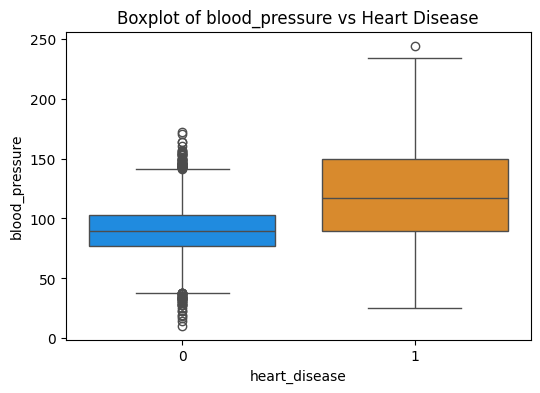

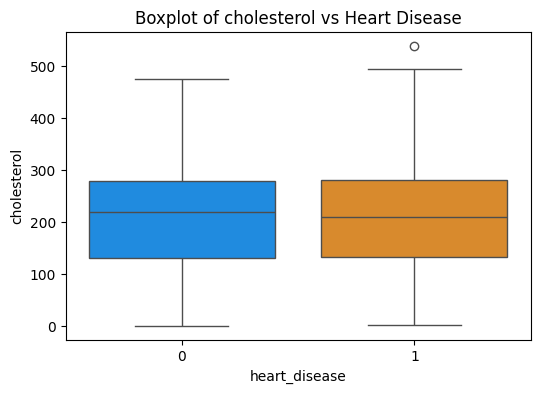

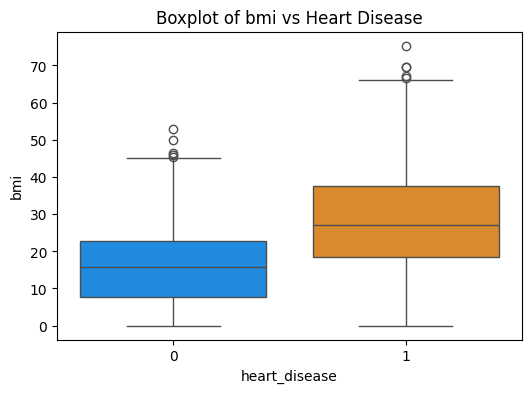

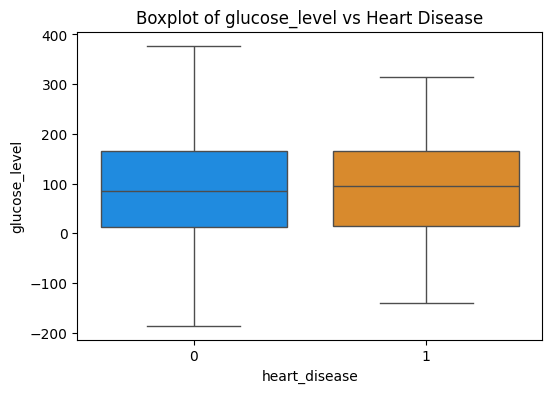

In [114]:
# Create boxplots for numeric columns grouped by heart disease
colors = ['#008FFF', '#F58D10']
for col in ['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose_level']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='heart_disease', y=col, data=df, palette=colors)
    plt.title(f'Boxplot of {col} vs Heart Disease')
    plt.show()

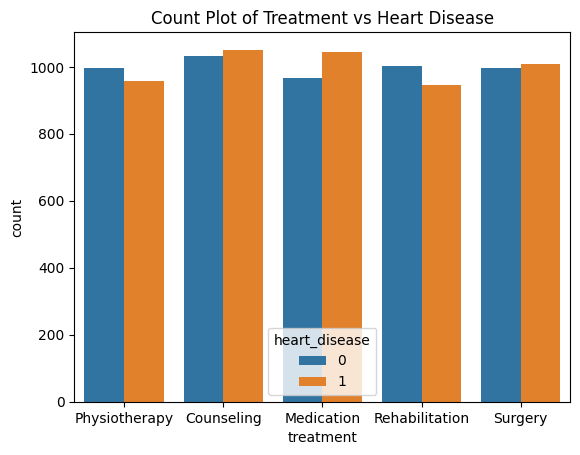

In [115]:
# Categorical count plot for 'treatment' grouped by heart disease
sns.countplot(x='treatment', hue='heart_disease', data=df)
plt.title('Count Plot of Treatment vs Heart Disease')
plt.show()

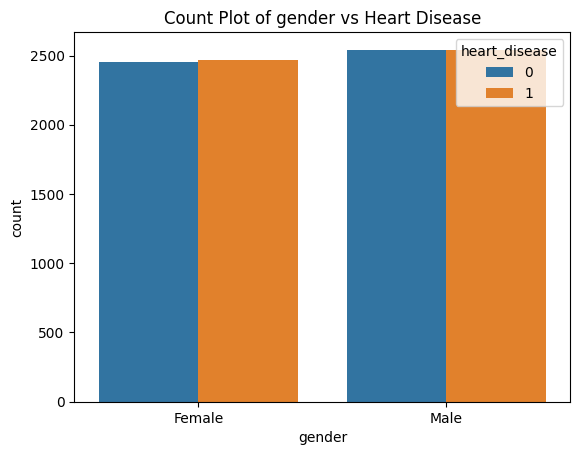

In [116]:
# Categorical count plot for 'gender' grouped by heart disease
sns.countplot(x='gender', hue='heart_disease', data=df)
plt.title('Count Plot of gender vs Heart Disease')
plt.show()

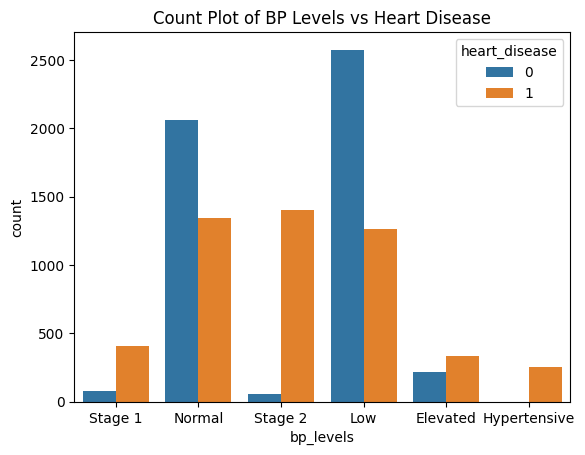

In [117]:
# Categorical count plot for 'BP Levels' grouped by heart disease
sns.countplot(x='bp_levels', hue='heart_disease', data=df)
plt.title('Count Plot of BP Levels vs Heart Disease')
plt.show()

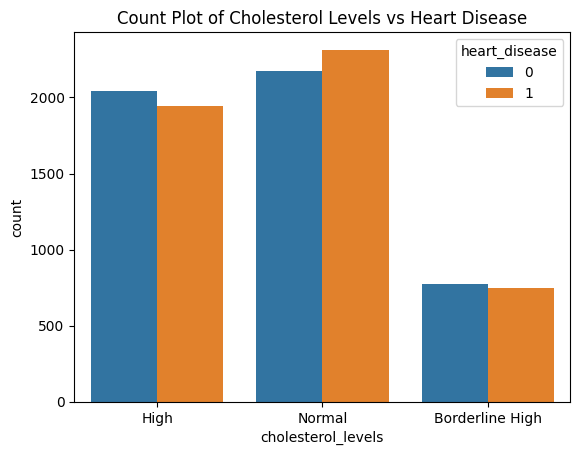

In [118]:
# Categorical count plot for 'cholesterol_levels' grouped by heart disease
sns.countplot(x='cholesterol_levels', hue='heart_disease', data=df)
plt.title('Count Plot of Cholesterol Levels vs Heart Disease')
plt.show()

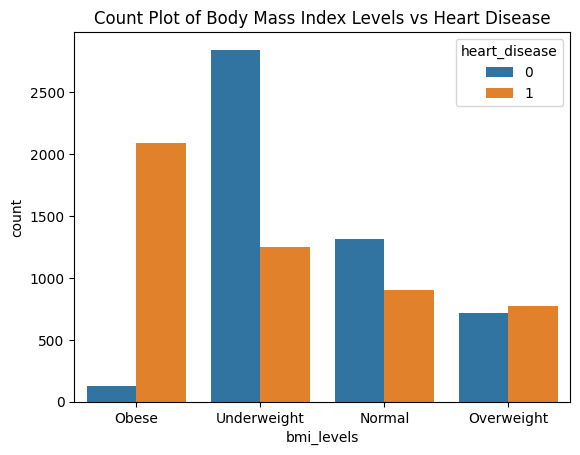

In [119]:
# Categorical count plot for 'bmi_levels' grouped by heart disease
sns.countplot(x='bmi_levels', hue='heart_disease', data=df)
plt.title('Count Plot of Body Mass Index Levels vs Heart Disease')
plt.show()

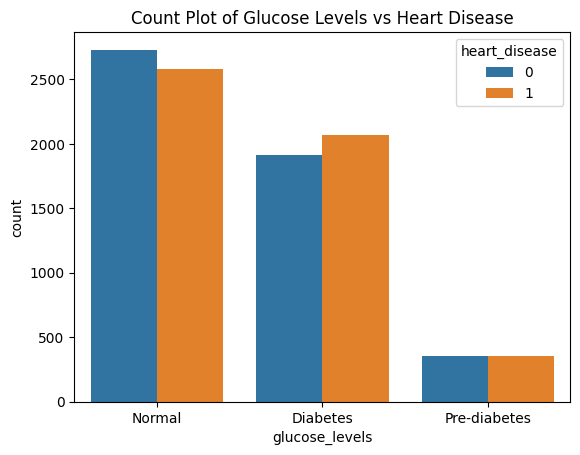

In [120]:
# Categorical count plot for 'glucose_levels' grouped by heart disease
sns.countplot(x='glucose_levels', hue='heart_disease', data=df)
plt.title('Count Plot of Glucose Levels vs Heart Disease')
plt.show()

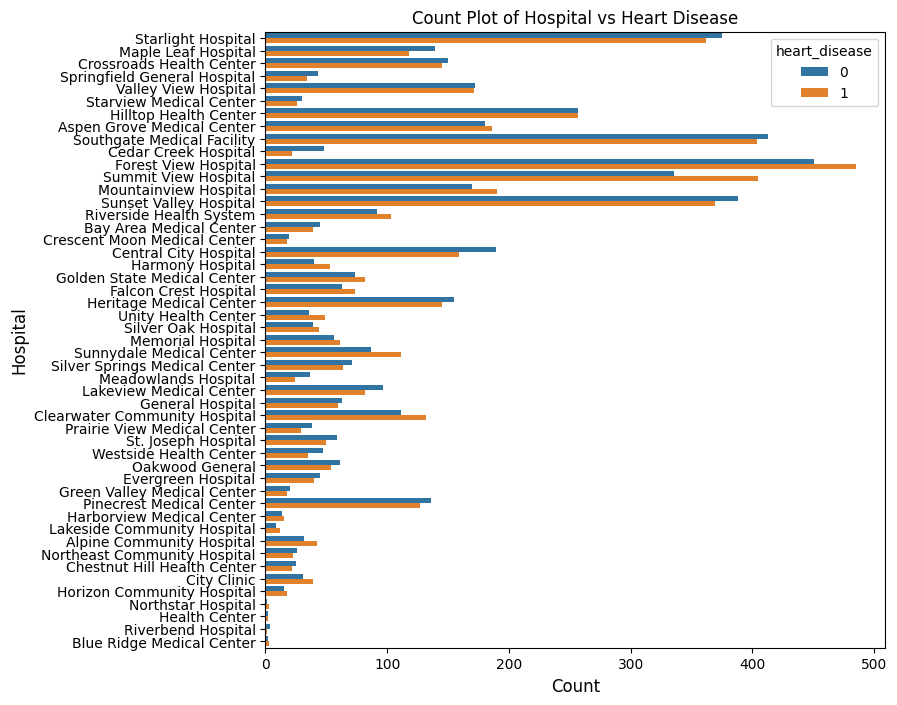

In [121]:
# Categorical count plot for 'hospital' grouped by heart disease
plt.figure(figsize=(8, 8))
sns.countplot(y='hospital', hue='heart_disease', data=df)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Hospital', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Count Plot of Hospital vs Heart Disease')
plt.show()

In [122]:
#Geo map of Heart Disease cases

import folium
from folium.plugins import HeatMap

# Aggregate the data to count how many '1' values (heart disease) in each state
df_agg = df[df['heart_disease'] == 1].groupby('state').size().reset_index(name='heart_disease_count')

# Create a dictionary to map states to their heart disease counts
state_data = df_agg.set_index('state')['heart_disease_count'].to_dict()

# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)

#Add the choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json',
    name='choropleth',
    data=df_agg,
    columns=['state', 'heart_disease_count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heart Disease Cases'
).add_to(m)

#Add a layer control
folium.LayerControl().add_to(m)

#Show the map
m.save('heart_disease_map.html')  # Save the map to an HTML file
m

#### Top 5 most number of cases according to states
#### Oregon      = 125
#### Michigan    = 124
#### New Mexico  = 118
#### Connecticut = 114
#### Maryland    = 112



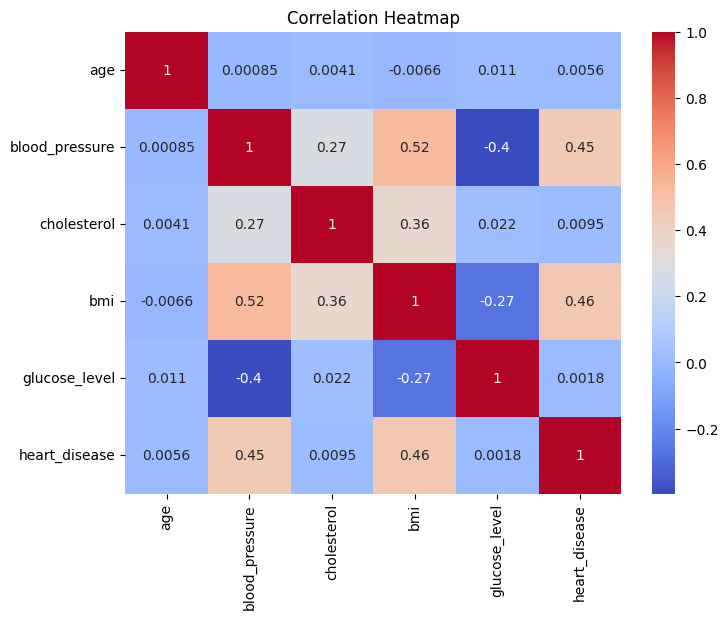

In [124]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose_level', 'heart_disease']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [125]:
df.dtypes

,0
full_name,object
age,int64
country,object
state,object
blood_pressure,float64
cholesterol,float64
bmi,float64
glucose_level,float64
gender,object
first_name,object


In [126]:
df1 = df.copy()
df1.head()

,full_name,age,country,state,blood_pressure,cholesterol,bmi,glucose_level,gender,first_name,last_name,hospital,treatment,treatment_date,heart_disease,bp_levels,cholesterol_levels,bmi_levels,glucose_levels
0,Alice Johnson,21,USA,Utah,138.07,270.56,36.10,63.49,Female,Alice,Johnson,Starlight Hospital,Physiotherapy,2021-07-07 21:23:23.542872956,1,Stage 1,High,Obese,Normal
1,Bob Williams,44,USA,North Dakota,100.38,160.91,14.33,187.01,Female,Bob,Williams,Maple Leaf Hospital,Counseling,2023-09-13 07:31:37.167014532,0,Normal,Normal,Underweight,Diabetes
2,Oliver Jones,22,USA,Iowa,145.62,208.49,20.28,35.90,Female,Oliver,Jones,Crossroads Health Center,Medication,2019-11-22 03:56:29.389793943,0,Stage 2,Borderline High,Normal,Normal
3,Quinn Davis,19,USA,Louisiana,152.58,348.15,62.71,31.50,Female,Quinn,Davis,Springfield General Hospital,Counseling,2021-10-09 23:10:16.253672680,1,Stage 2,High,Obese,Normal
4,Alice Martinez,64,USA,Massachusetts,111.79,200.63,14.47,154.51,Female,Alice,Martinez,Valley View Hospital,Rehabilitation,2018-03-16 04:43:59.950843739,1,Normal,Borderline High,Underweight,Diabetes


In [127]:
df1.drop(['full_name', 'state', 'country', 'hospital', 'first_name', 'last_name', 'gender', 'treatment_date'], axis=1, inplace=True)

In [128]:
df1.head()

,age,blood_pressure,cholesterol,bmi,glucose_level,treatment,heart_disease,bp_levels,cholesterol_levels,bmi_levels,glucose_levels
0,21,138.07,270.56,36.10,63.49,Physiotherapy,1,Stage 1,High,Obese,Normal
1,44,100.38,160.91,14.33,187.01,Counseling,0,Normal,Normal,Underweight,Diabetes
2,22,145.62,208.49,20.28,35.90,Medication,0,Stage 2,Borderline High,Normal,Normal
3,19,152.58,348.15,62.71,31.50,Counseling,1,Stage 2,High,Obese,Normal
4,64,111.79,200.63,14.47,154.51,Rehabilitation,1,Normal,Borderline High,Underweight,Diabetes


##6. Label Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['treatment'] = le.fit_transform(df1['treatment'])
df1['bp_levels'] = le.fit_transform(df1['bp_levels'])
df1['cholesterol_levels'] = le.fit_transform(df1['cholesterol_levels'])
df1['bmi_levels'] = le.fit_transform(df1['bmi_levels'])
df1['glucose_levels'] = le.fit_transform(df1['glucose_levels'])

In [130]:
df1.head()

,age,blood_pressure,cholesterol,bmi,glucose_level,treatment,heart_disease,bp_levels,cholesterol_levels,bmi_levels,glucose_levels
0,21,138.07,270.56,36.10,63.49,2,1,4,1,1,1
1,44,100.38,160.91,14.33,187.01,0,0,3,2,3,0
2,22,145.62,208.49,20.28,35.90,1,0,5,0,0,1
3,19,152.58,348.15,62.71,31.50,0,1,5,1,1,1
4,64,111.79,200.63,14.47,154.51,3,1,3,0,3,0


##7. Feature Selection Using Correlation Heatmap

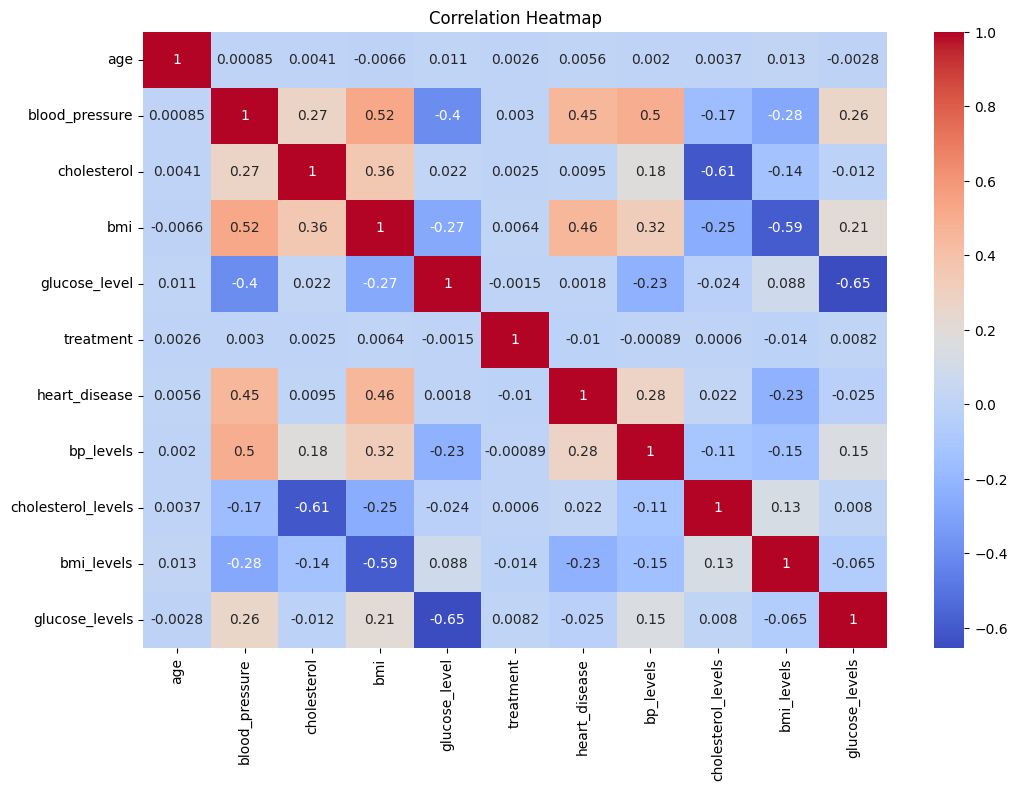

In [131]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1[['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose_level', 'treatment', 'heart_disease', 'bp_levels', 'cholesterol_levels', 'bmi_levels', 'glucose_levels']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [132]:
X = df1.drop(columns=['age', 'treatment', 'heart_disease', 'bp_levels', 'cholesterol_levels', 'bmi_levels', 'glucose_levels'])
y = df1[['heart_disease']]

##8. Splitting the dataset into train and test sets

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##9. Standardizing the dataset



In [134]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##10. Logistic Regression Classifier to predict the Heart Disease

In [135]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [136]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix

In [137]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[776, 252],
       [215, 757]])

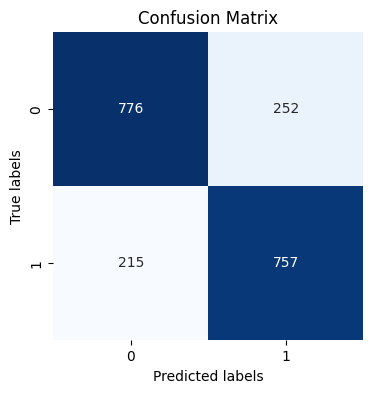

In [138]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1028
           1       0.75      0.78      0.76       972

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



##11. Decision Tree Classifier to predict the Heart Disease

In [140]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [141]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[942,  86],
       [ 78, 894]])

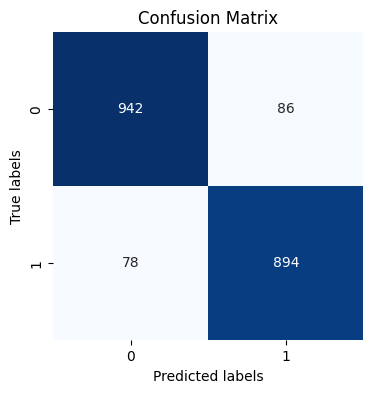

In [142]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1028
           1       0.91      0.92      0.92       972

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



##12. Random Forest Classifier to predict the Heart Disease

In [144]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [145]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[953,  75],
       [ 50, 922]])

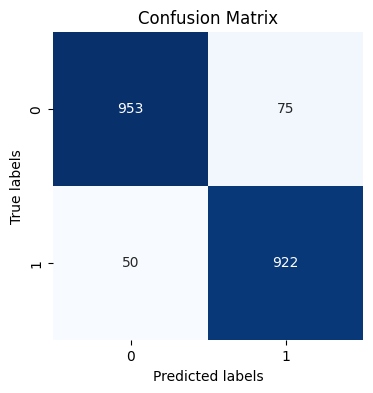

In [146]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1028
           1       0.92      0.95      0.94       972

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



##13. Support Vector Machine Classifier to predict the Heart Disease

In [148]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [149]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[936,  92],
       [ 47, 925]])

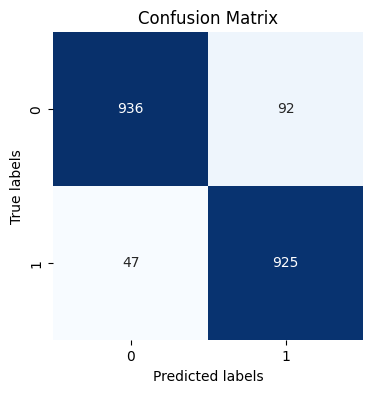

In [150]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1028
           1       0.91      0.95      0.93       972

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



##14. KNearest Neighbour Classifier to predict the Heart Disease

In [152]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)

In [153]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[964,  64],
       [ 45, 927]])

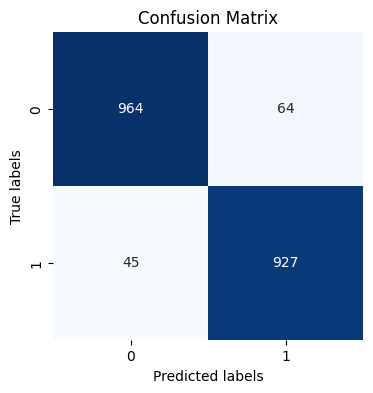

In [154]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1028
           1       0.94      0.95      0.94       972

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



##15. XG Boost Classifier to predict the Heart Disease

In [156]:
#XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)

In [157]:
cm = (confusion_matrix(y_test,y_pred))
cm

array([[954,  74],
       [ 49, 923]])

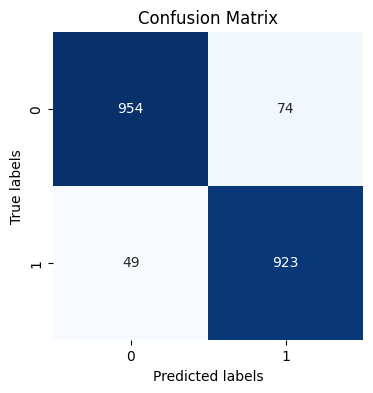

In [158]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1028
           1       0.93      0.95      0.94       972

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



###**Conclusion:**
K-Nearest Neighbour Classifier gives highest predictive accuracy of 95%. This high accuracy indicates that KNN is particularly adept at recognising patterns within the
dataset & eﬀectively diﬀerentiating between patients with and without heart disease. The result
demonstrate the significant potential of machine learning in medical diagnostics, where such
predictive tools can provide valuable support to healthcare professionals. This study highlights
the role of feature selection, data processing, and classification methods in developing
accurate prediction models that could contribute to preventive measures and improved patient
outcomes in the field of cardiology.